In [31]:
#!pip install tweepy
import re
import nltk
import tweepy
import string
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [32]:
df = pd.read_csv("E:/Freelance Projects/Coding with Jupeter Notebook for Data Science assignment/To be Submitted/9. Text Mining/Elon_musk.csv")

In [33]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!


In [34]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [35]:
df.shape

(1999, 1)

In [36]:
# let's have a look at some tweets
pd.set_option("display.max_colwidth", 1) # allows us to see the full text
df.sample(10)

,Text
1788,@ajtourville Cool
108,Feels weird helping make (hopefully good version of) Cyberpunk come true
1868,Das baby kann noch keinen l�ffel benutzen https://t.co/UETqVIA4BP
1904,@m4ttwegner @flcnhvy BDE
458,@teslaownerssv It will get absurdly good. Tesla AI/Autopilot engineering is awesome! There�s some great AI out ther� https://t.co/v8mUhEApOQ
1510,"@Teslarati We really need a bigger one, so adults can squeeze in too. Guaranteed to make a party more fun. Works well with flamethrowers!"
460,@Teslarati @13ericralph31 This is incorrect
640,@AstroJordy @flcnhvy Yeah
1841,"You don�t have a soul, you are a soul"
1066,"@teslaownersSV @raytech247 @WholeMarsBlog Yes, the Gigafactory is the hardest &amp; most critical product"


In [37]:
# we need to remove a lot of junk(urls, tags, RT, Hashtags) from the tweets
# so we will use regular exlpression for that
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('[�]','',text)
    return text

In [38]:
# Clean The Text
df["Text"] = df["Text"].apply(clean_text)
df.head()

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazing execution last year now on to the next for even more


In [9]:
# let's see if it cleaned everything or not
pd.set_option("display.max_colwidth", -1) # allows us to see the full text
df.sample(10)

<ipython-input-9-ec3dc7179ffa>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1) # allows us to see the full text


,Text
387,teslaownerssv lexfridman you mean install the external speaker on earlier cars that dont have it
719,erujabidi am getting wildly different results from different labs but most likely i have a moderate case of covid httpstcoxlbahahjoj
696,rt spacex spacexs customtailored suits route the communications and cooling systems and protect the crew in the event of cabin depressu
200,rt spacex falcon s first stage has landed on the of course i still love you droneship
295,erdayastronaut spacex that too
1548,wholemarsblog
1089,alvianchoiri ahem yes it was the flight of this booster amp flight for active half of fairing aiming for
625,tweetmenima teslaownerssv if next weeks release looks good we will widen beta
1123,spexcast williammbrown rationaletienne ppathole thesheetztweetz waemd spacex spacexstarlink wanationalguard great
943,juanjacobs jwangark firmware is probably a slightly more accurate description but yes


In [10]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# function for Polarity
def calc_pola(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df['Subjectivity'] = df.Text.apply(calc_subj)
df['Polarity'] = df.Text.apply(calc_pola)

In [11]:
# let's have quick look to our dataset
df.head(10)

,Text,Subjectivity,Polarity
0,im an alien,0.750000,-0.250000
1,idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,teslacn congratulations tesla china for amazing execution last year now on to the next for even more,0.366667,0.275000
5,happy new year of the ox,0.727273,0.468182
6,frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm,0.400000,0.000000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely do not represent realworld time allocation,0.500000,0.000000
9,the most entertaining outcome is the most likely,0.675000,0.375000


In [12]:
# now let's classify these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result

In [13]:
df['Sentiment'] = df.Polarity.apply(sentiment)

In [14]:
### Print the data
df.head()

,Text,Subjectivity,Polarity,Sentiment
0,im an alien,0.750000,-0.250,Negative
1,idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it,0.000000,0.000,Netural
2,joerogan spotify great interview,0.750000,0.800,Positive
3,doge is underestimated,0.000000,0.000,Netural
4,teslacn congratulations tesla china for amazing execution last year now on to the next for even more,0.366667,0.275,Positive


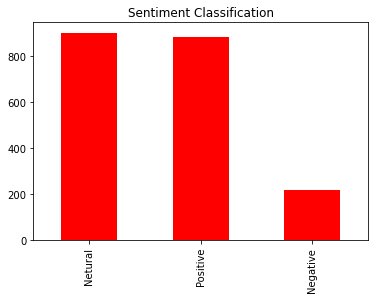

In [15]:
# let's see how many ratio of sentiment
df.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

Text(0, 0.5, 'Subjectivity')

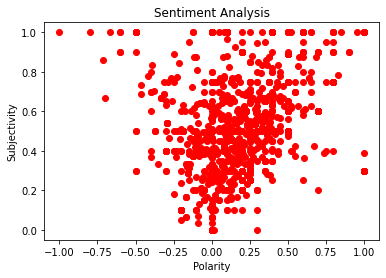

In [16]:
plt.scatter(df.Polarity, df.Subjectivity, color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [17]:
# let's see the percentage of different sentiment's class
 
# Creat
Df_sentiment = pd.DataFrame(df.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = df.Sentiment.value_counts()

In [18]:
Df_sentiment

,Sentiment,Total
Netural,45.022511,900
Positive,44.072036,881
Negative,10.905453,218


In [19]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df11 = pd.DataFrame(denselist, columns = names_features)
df11

C:\Users\proyas.bose\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Bigram

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [23]:
top2_words = get_top_n2_words(df["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,will be,51
2,of the,47
3,this is,36
4,in the,36


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'will be'),
 Text(2, 0, 'of the'),
 Text(3, 0, 'this is'),
 Text(4, 0, 'in the'),
 Text(5, 0, 'to the'),
 Text(6, 0, 'to be'),
 Text(7, 0, 'is the'),
 Text(8, 0, 'should be'),
 Text(9, 0, 'on the'),
 Text(10, 0, 'it will'),
 Text(11, 0, 'would be'),
 Text(12, 0, 'lot of'),
 Text(13, 0, 'spacex falcon'),
 Text(14, 0, 'erdayastronaut spacex'),
 Text(15, 0, 'for the'),
 Text(16, 0, 'we will'),
 Text(17, 0, 'the spacestation'),
 Text(18, 0, 'is not'),
 Text(19, 0, 'need to')]

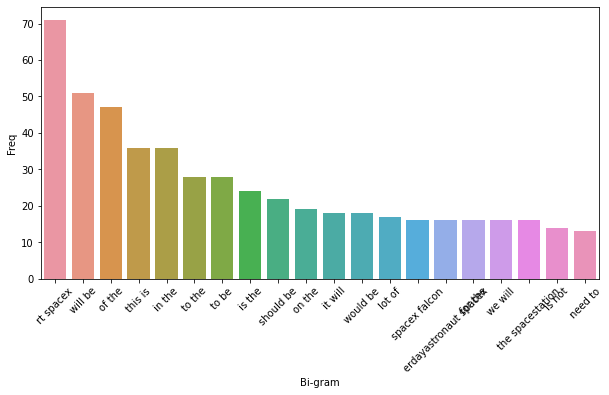

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])